# A1
## Group 8
**Submitted by: ZHANG Zhiyuan, 20030624-T126, zhizhan@student.chalmers.se** <br />
**Submitted by: LI Chenzhao, , chenzhao@chalmers.se** <br />

# Task 0

In [63]:
!python --version
!which -a python
!which -a pip
%pip install pandas scikit-learn numpy

Python 3.11.3


/Users/hollyzhang/anaconda3/bin/python
/Users/hollyzhang/anaconda3/bin/python
/Users/hollyzhang/Library/Python/3.9/bin/pip
/usr/local/bin/pip
/Users/hollyzhang/Library/Python/3.9/bin/pip
/Users/hollyzhang/anaconda3/bin/pip
/opt/homebrew/bin/pip
/usr/local/bin/pip
/usr/local/bin/pip
/Users/hollyzhang/Library/Python/3.9/bin/pip
/Users/hollyzhang/anaconda3/bin/pip
/opt/homebrew/bin/pip
/usr/local/bin/pip
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [64]:
import os
os.getcwd()

'/Users/hollyzhang/Documents/GitHub/Applied-ML-2024/Assignment'

# Task 1

## Step 1

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
data = pd.read_csv("./A1_CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [66]:
X.head(3)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0


22


<Axes: title={'center': 'Correlation Matrix'}>

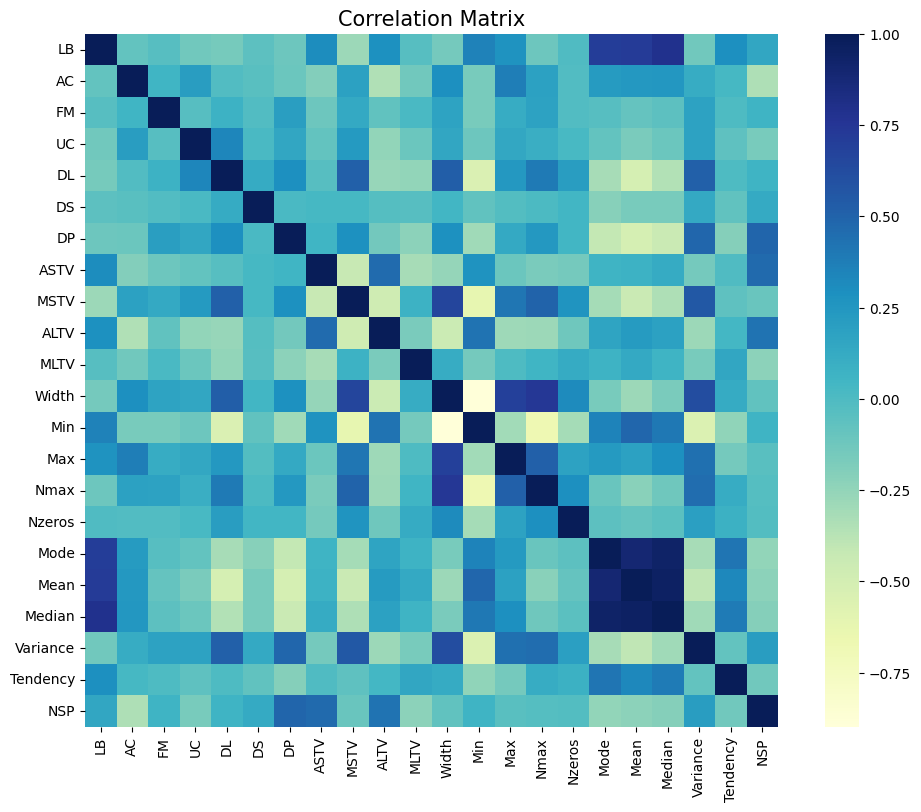

In [67]:
#Correlation map to see how features are correlated with SalePrice
import matplotlib.pyplot as plt 
import seaborn as sns
print(len(data.columns))
corrmat = data.corr()
plt.subplots(figsize=(12,9))
plt.title('Correlation Matrix', fontsize=15)
sns.heatmap(corrmat, square=True, cmap="YlGnBu")

## Step 2

### Baseline

In [68]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')

In [69]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xtrain, Ytrain).mean()

0.7805882352941176

## Step 3

In [70]:
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 

DTree = DecisionTreeClassifier()
RForest = RandomForestClassifier()
GBoost = GradientBoostingClassifier()

DTree.fit(Xtrain, Ytrain)
RForest.fit(Xtrain, Ytrain)
GBoost.fit(Xtrain, Ytrain)

y_pred_DTree = DTree.predict(Xtest)
y_pred_RForest = RForest.predict(Xtest)
y_pred_GBoost = GBoost.predict(Xtest)

DTree_score = cross_val_score(DTree, Xtrain, Ytrain).mean()
RForest_score = cross_val_score(RForest, Xtrain, Ytrain).mean()
GBoost_score = cross_val_score(GBoost, Xtrain, Ytrain).mean()

print("Decision Tree:", DTree_score)
print("Random Forest:", RForest_score)
print("Gradient Boosting:", GBoost_score)

Decision Tree: 0.9176470588235294
Random Forest: 0.9370588235294118
Gradient Boosting: 0.9488235294117647


### emmmmmmmm .......

In [71]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import LinearSVC

# Perceptron
perceptron = Perceptron(random_state=0)
perceptron.fit(Xtrain, Ytrain)

# Logistic Regression
logreg = LogisticRegression(random_state=0)
logreg.fit(Xtrain, Ytrain)  

# Linear SVM
linear_svm = LinearSVC(random_state=0)
linear_svm.fit(Xtrain, Ytrain)

# Cross-validation
Per_score = cross_val_score(perceptron, Xtrain, Ytrain).mean()
LogReg_score = cross_val_score(logreg, Xtrain, Ytrain).mean()
LSVM_score = cross_val_score(linear_svm, Xtrain, Ytrain).mean()

print("Perceptron:", Per_score)
print("Logistic Regression:", LogReg_score)
print("Linear SVM:", LSVM_score)

/Users/hollyzhang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hollyzhang/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/hollyzhang/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hollyzhang/Libr

Perceptron: 0.825294117647059
Logistic Regression: 0.8747058823529411
Linear SVM: 0.8452941176470589


/Users/hollyzhang/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hollyzhang/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/hollyzhang/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(15, 10, 6), max_iter=200, random_state=0)
mlp.fit(Xtrain, Ytrain)
y_pred = mlp.predict(Xtest)
accuracy = accuracy_score(Ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8802816901408451


## Step 4

In [73]:
GBoost.fit(Xtrain, Ytrain)
Yguess = GBoost.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.9295774647887324


# Task 2: Decision trees for classification
See `Lecture 1_pre.ipynb`

# Task 3: A regression example

In [77]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("./A1_sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [78]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.0016582 , 0.00079274, 0.00060177, 0.00065398, 0.00053716]),
 'score_time': array([0.00038195, 0.00028801, 0.00029707, 0.00022411, 0.00021076]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

In [79]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
y_pred_lr = lr.predict(Xtest)

# Ridge Regression  
ridge = Ridge()
ridge.fit(Xtrain, Ytrain)
y_pred_ridge = ridge.predict(Xtest)

# Lasso Regression
lasso = Lasso()
lasso.fit(Xtrain, Ytrain)
y_pred_lasso = lasso.predict(Xtest)

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(Xtrain, Ytrain)
y_pred_dt = dt.predict(Xtest)

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(Xtrain, Ytrain)
y_pred_rf = rf.predict(Xtest)

# Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(Xtrain, Ytrain)
y_pred_gb = gb.predict(Xtest)

# MLP Regressor
mlp = MLPRegressor()
mlp.fit(Xtrain, Ytrain)
y_pred_mlp = mlp.predict(Xtest)

lr_score = cross_validate(lr, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean()
ridge_score = cross_validate(ridge, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean()
lasso_score = cross_validate(lasso, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean()
dt_score = cross_validate(dt, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean()
rf_score = cross_validate(rf, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean()
gb_score = cross_validate(gb, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean()
mlp_score = cross_validate(mlp, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean()

print("Linear Regression:", lr_score)
print("Ridge Regression:", ridge_score)
print("Lasso Regression:", lasso_score)
print("Decision Tree Regressor:", dt_score)
print("Random Forest Regressor:", rf_score)
print("Gradient Boosting Regressor:", gb_score)
print("MLP Regressor:", mlp_score)

Linear Regression: -0.3013986588767263
Ridge Regression: -0.30139784232179734
Lasso Regression: -0.3010470671748873
Decision Tree Regressor: -0.529482691930167
Random Forest Regressor: -0.28328280569173847
Gradient Boosting Regressor: -0.26451929306160366
MLP Regressor: -128.20972116428112


### Smaller MSE == better performance

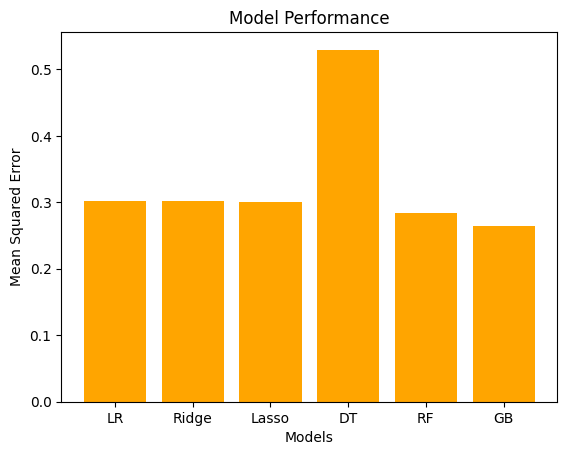

In [81]:
# Assuming the scores are negative mean squared errors, we take the negative of the scores to get the MSE.
scores = [-lr_score, -ridge_score, -lasso_score, -dt_score, -rf_score, -gb_score]#, -mlp_score]
labels = ['LR', 'Ridge', 'Lasso', 'DT', 'RF', 'GB']#, 'MLP']

plt.bar(labels, scores, color='orange')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance')
plt.show()


In [82]:
from sklearn.metrics import mean_squared_error
  
gb.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, gb.predict(Xtest))

0.2714534703875601

# Task 4: Decision trees for regression

## Step 2

In [ ]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y